In [1]:
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston)
dfX = pd.DataFrame(boston.data, columns = boston.feature_names)
dfy = pd.DataFrame(boston.target, columns = ['MEDV'])

In [2]:
df = pd.concat([dfX,dfy], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
cols = ['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV' ]
sns.pairplot(df[cols], height=5)

plt.show()

<Figure size 7000x7000 with 210 Axes>

# 종속 변수와 독립 변수 간의 관계 선형성 확인 : RM과 LSTAT가 높음

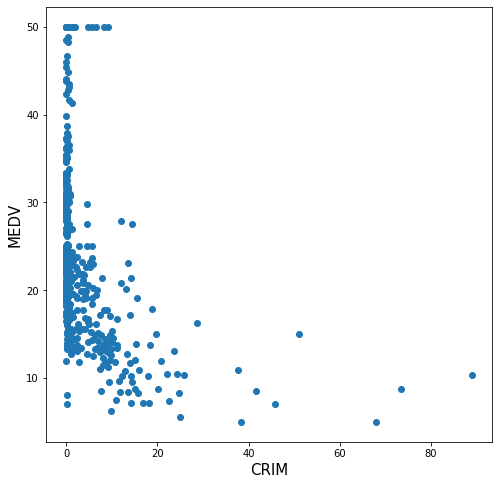

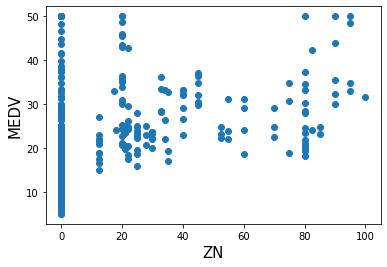

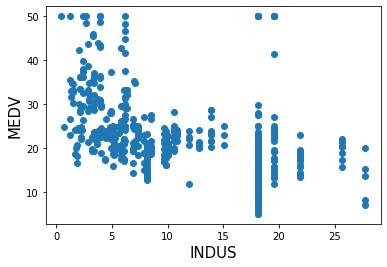

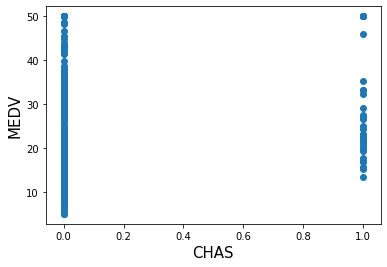

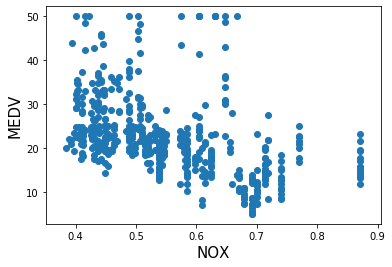

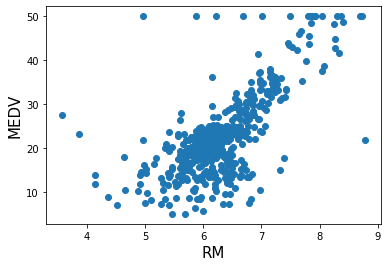

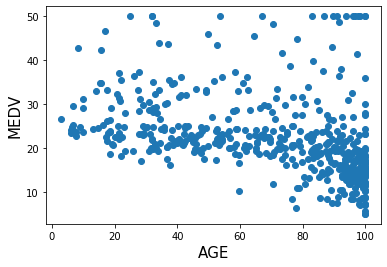

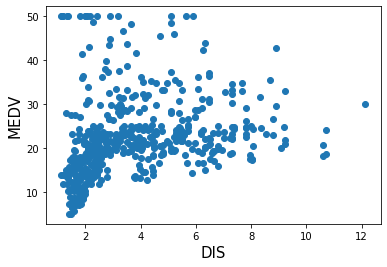

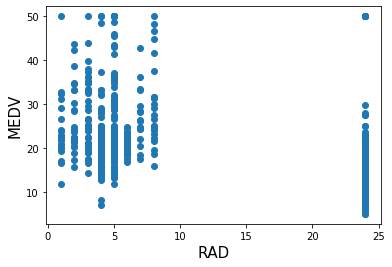

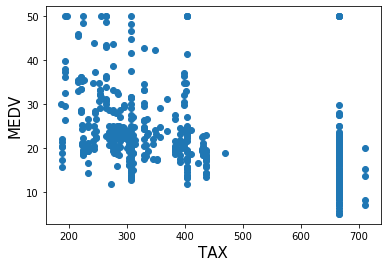

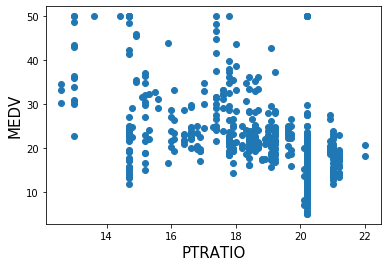

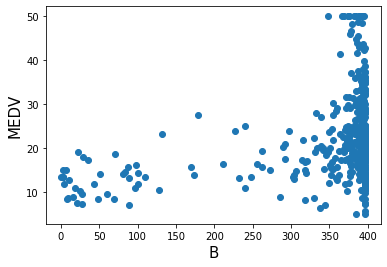

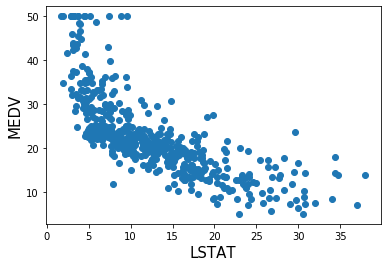

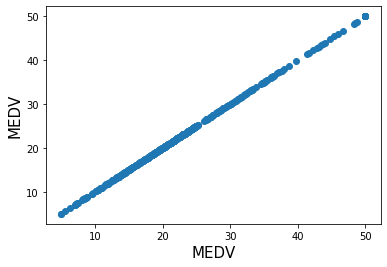

In [4]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
for i in cols:
    plt.scatter(df[i],df['MEDV']) ## 원 데이터 산포도 (x,y)
    plt.xlabel(i, fontsize=font_size)
    plt.ylabel('MEDV',fontsize=font_size)
    plt.show()

# 상관계수 : rm과 lstat가 높음 

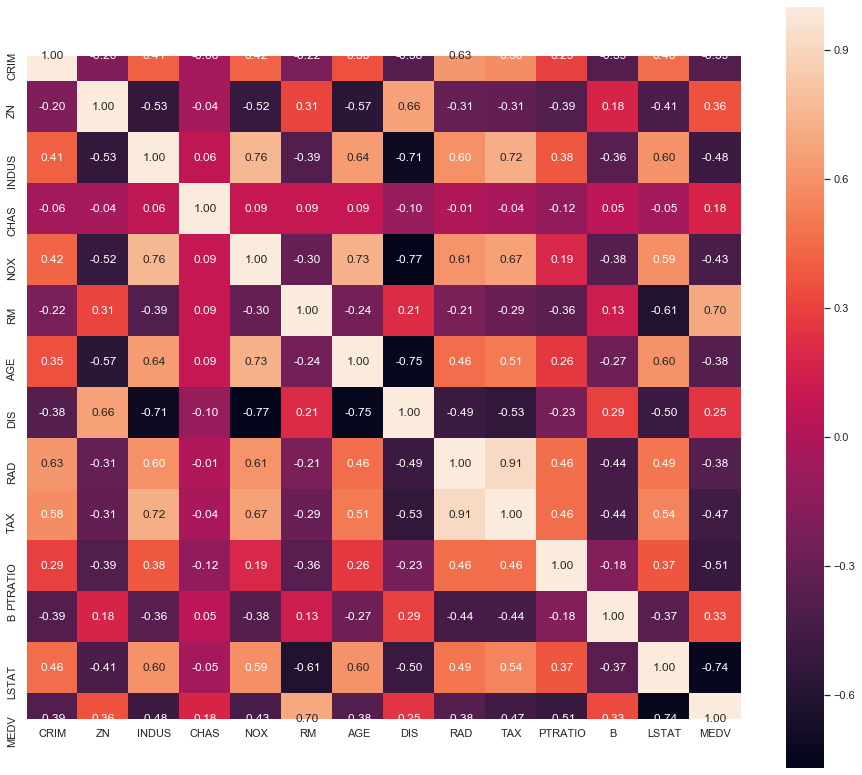

In [5]:
import numpy as np


cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.0)
plt.figure(figsize=(16,14))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)


plt.show()

# RM의 r^2 는 0.484

In [6]:
from statsmodels.formula.api import ols

In [7]:
fit = ols('MEDV ~ RM', data = df).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           2.49e-74
Time:                        23:13:05   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# LSTAT의 r^2 는 0.544

In [8]:
fit = ols('MEDV ~ LSTAT', data = df).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           5.08e-88
Time:                        23:13:05   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
X_rm = df['RM']
y = df['MEDV']

from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()
line_fitter.fit(X_rm.values.reshape(-1,1), y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
line_fitter.coef_

array([9.10210898])

In [11]:
line_fitter.intercept_

-34.670620776438554

# 그림으로 나타나봄

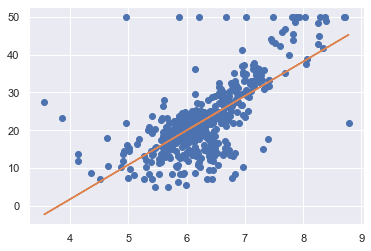

In [12]:
plt.plot(X_rm, y, 'o')
plt.plot(X_rm,line_fitter.predict(X_rm.values.reshape(-1,1)))
plt.show()

In [13]:
X_ls = df['LSTAT']
line_fitter.fit(X_ls.values.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
line_fitter.coef_

array([-0.95004935])

In [15]:
line_fitter.intercept_

34.5538408793831

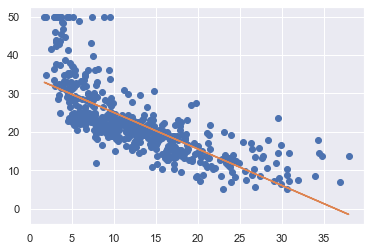

In [16]:
plt.plot(X_ls, y, 'o')
plt.plot(X_ls,line_fitter.predict(X_ls.values.reshape(-1,1)))
plt.show()

### RANSAC을 사용하여 안정된 회귀 모델 훈련하기  
- outlier를 제거한 샘플들로 회귀 모델 훈련하는 방식


1. random하게 일부 샘플을 정상치로 택하여 모델을 훈련
2. 훈련된 모델에서 다른 모든 포인트를 테스트. 사용자가 입력한 하용 오차 안에 속한 포인트를 정상치에 추가한다. 
3. 모든 정상치를 사용해 모델을 다시 훈련
4. 훈련된 모델과 정상치 간의 오차를 추정
5. 성능이 사용자가 지정한 임계 값에 도달하거나 지정된 반복 횟수에 도달하면 알고리즘을 종료한다. 그렇지 않으면 1~4 반복

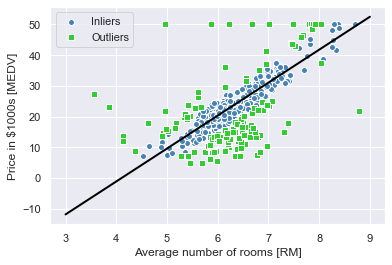

In [17]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)
X = df[['RM']].values
y = df['MEDV'].values

ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

plt.show()

In [18]:
print('기울기: %.3f' % ransac.estimator_.coef_[0])
print('절편: %.3f' % ransac.estimator_.intercept_)

기울기: 10.735
절편: -44.089


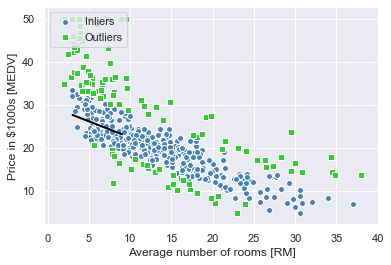

In [19]:
X = df[['LSTAT']].values
y = df['MEDV'].values

ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

plt.show()

In [20]:
print('기울기: %.3f' % ransac.estimator_.coef_[0])
print('절편: %.3f' % ransac.estimator_.intercept_)

기울기: -0.746
절편: 29.882


# 다중선형회귀

In [21]:
from sklearn.model_selection import train_test_split # train :
x = df.iloc[:,:-1].values
y = df['MEDV'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [22]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(mlr.coef_)

[-1.01360062e-01  4.82900245e-02  5.02979081e-02  3.36173725e+00
 -1.87544598e+01  3.39297658e+00  6.13203869e-03 -1.46729574e+00
  3.23522651e-01 -1.21713906e-02 -8.99851495e-01  1.02128831e-02
 -5.84062377e-01]


In [24]:
print(mlr.intercept_)

38.20035071330521


In [25]:
print(mlr.score(x_train, y_train)) # r^2 값 

0.729473156036682


In [26]:
y_test_pred = mlr.predict(x_test)
y_train_pred = mlr.predict(x_train)

In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)

mse

20.663611745631453

In [28]:
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse

4.5457245567270625

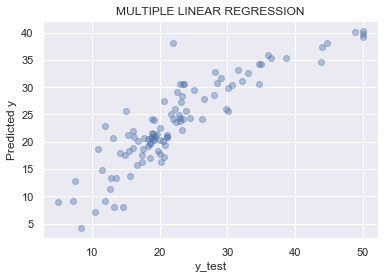

In [33]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test_pred, alpha=0.4)
plt.xlabel("y_test")
plt.ylabel("Predicted y")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [34]:
import statsmodels.api as sm
model_boston = sm.OLS(y, x)
result_boston = model_boston.fit()
print(result_boston.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Fri, 19 Mar 2021   Prob (F-statistic):                        0.00
Time:                        23:13:47   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

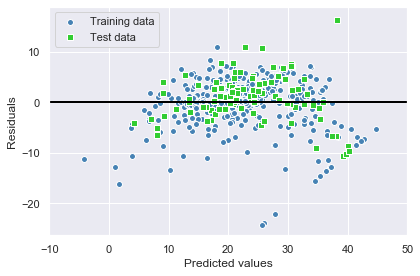

In [35]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

# 테스트 데이터의 mse가 더 높은 것으로 보아 overfitting 되어 있음

In [36]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 22.473, 테스트 MSE: 20.664
훈련 R^2: 0.729, 테스트 R^2: 0.770


In [37]:
# Forward Selection 전진 선택법
variables = df.columns[:-1].tolist() ## 설명 변수 리스트
 
y = df['MEDV'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

C:\Users\diekw\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [38]:
selected_variables

['LSTAT',
 'RM',
 'PTRATIO',
 'DIS',
 'NOX',
 'CHAS',
 'B',
 'ZN',
 'CRIM',
 'RAD',
 'TAX']

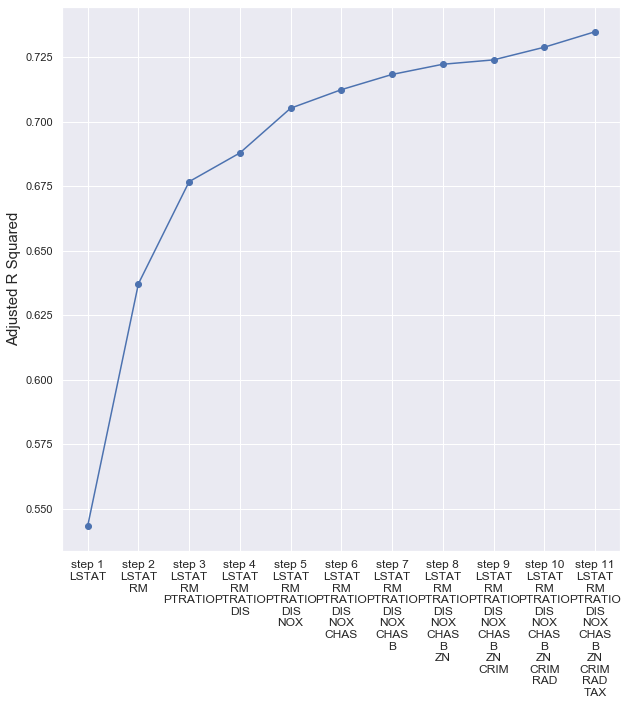

In [39]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [40]:
import statsmodels.api as sm
x = df[selected_variables].values
model_boston1 = sm.OLS(y, x)
result_boston1 = model_boston1.fit()
print(result_boston1.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1057.
Date:                Fri, 19 Mar 2021   Prob (F-statistic):                        0.00
Time:                        23:13:54   Log-Likelihood:                         -1523.9
No. Observations:                 506   AIC:                                      3070.
Df Residuals:                     495   BIC:                                      3116.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [44]:
# Backward Elimination 후진 소거법
variables2 = df.columns[:-1].tolist() ## 설명 변수 리스트
 
y2 = df['MEDV'] ## 반응 변수
selected_variables2 = variables2 ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables2) > 0:
    X = sm.add_constant(df[selected_variables2])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables2.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables2])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [45]:
x = df[selected_variables2].values
model_boston2 = sm.OLS(y, x)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1057.
Date:                Fri, 19 Mar 2021   Prob (F-statistic):                        0.00
Time:                        23:14:17   Log-Likelihood:                         -1523.9
No. Observations:                 506   AIC:                                      3070.
Df Residuals:                     495   BIC:                                      3116.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [46]:
selected_variables2

['CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

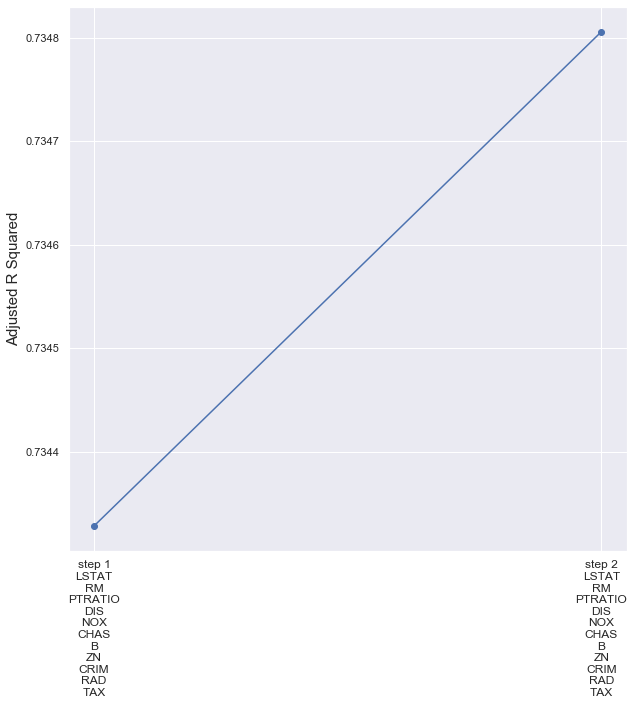

In [47]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [48]:
# Stepwise Selection 단계별 선택법
variables3 = df.columns[:-1].tolist() ## 설명 변수 리스트
 
y = df['MEDV'] ## 반응 변수
selected_variables3 = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables3) - set(selected_variables3))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables3+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables3.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables3) > 0:
            selected_X = df[selected_variables3]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables3.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables3])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables3.copy())
    else:
        break

In [49]:
selected_variables3

['LSTAT',
 'RM',
 'PTRATIO',
 'DIS',
 'NOX',
 'CHAS',
 'B',
 'ZN',
 'CRIM',
 'RAD',
 'TAX']

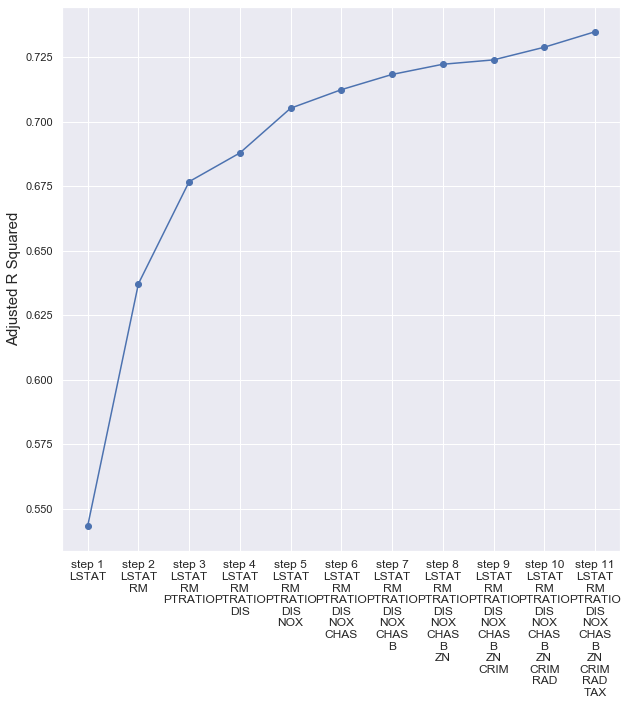

In [50]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [51]:
x = df[selected_variables3].values
model_boston3 = sm.OLS(y, x)
result_boston3 = model_boston3.fit()
print(result_boston3.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1057.
Date:                Fri, 19 Mar 2021   Prob (F-statistic):                        0.00
Time:                        23:15:10   Log-Likelihood:                         -1523.9
No. Observations:                 506   AIC:                                      3070.
Df Residuals:                     495   BIC:                                      3116.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# 세 가지의 변수 선택법(전진,후진, 선택) 모두 11가지 변수 선택

In [93]:

x_se = df[selected_variables3].values

X_train, X_test, y_train, y_test = train_test_split(
    x_se, y, test_size=0.2, random_state=0)

In [94]:
mlr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
y_train_pred = mlr.predict(X_train)
y_test_pred = mlr.predict(X_test)

In [96]:
print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 19.329, 테스트 MSE: 33.424
훈련 R^2: 0.773, 테스트 R^2: 0.590
